# REVAMPED Task 4.10: Coding Etiquette & Excel Reporting, Steps 5-8 + Addendum

### Contents
** **
A) Standard prerequisites, including library loading, path setup, and data import from Step 4.

Step 5:  Customer profiling.

         Step 5.1:  Restriction to 'highly active' customers.
         
                    Step 5.1.1:  Exploring 'gender'.
                    Step 5.1.2:  Exploring 'age'.
                    Step 5.1.3:  Exploring num_dependents (number of dependents).
                    Step 5.1.4:  Exploring fam_status ("family status").
                    Step 5.1.5:  Exploring income.
                    Step 5.1.6:  Exploring geographic region.

         Step 5.2:  Category cross-tabulation for further exploration.
         
                    Step 5.2.1:  Family status with number of dependents.
                    Step 5.2.2:  Age category with family status.
                    Step 5.2.3:  Age category with number of dependents.
                    Step 5.2.4:  Incorporate department names into customer order data.
                    Step 5.2.5:  Attempt to identify demographic 'parents-with-infants.'
                    Step 5.2.6:  Attempt to identify trends in 'alcohol' and/or 'pets' departments.
                    Step 5.2.7:  Do *any* demographics affect the  purchases of "baby" products?

Step 6:  Create an appropriate visualization to show the distribution of profiles.

Step 7:  Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Step 8:  Compare customer profiles with regions and departments.

Addendum:  Additional graphs for spreadsheet, addressing the questions posed in the Project Brief.

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [3]:
# Import itertools to help loop through lots of things.
import itertools

In [4]:
# Set a PATH variable.

In [5]:
# Linux PATH - Sadly, my Linux system with 8GB of total RAM could not import the new df_ords_prior DataFrame.
# BUT, now I have moved again, to an AWS EC2 instance that should be able to handle this.

In [6]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [7]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement4/Instacart-Basket-Analysis')

In [8]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM, so I migrated there.

In [9]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

### We have split our Notebook into two components to save time, in case we need to reload the results of previous steps.
### Start by reloading our high_cust_df from its pickle file and checking it for sanity.

In [10]:
high_cust_df = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared-Data', 'high_cust_df.pkl'))

In [11]:
high_cust_df.shape

(30964564, 33)

In [12]:
high_cust_df.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,...,frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,activity
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
4,1000,1000,Apricots,18,10,12.9,505689,138,9,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high


In [13]:
high_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404847
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   product_id              int64  
 2   product_name            object 
 3   aisle_id                int64  
 4   department_id           int64  
 5   prices                  float64
 6   order_id                int64  
 7   customer_id             int64  
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  price_range             object 
 15  price_range_loc         object 
 16  busiest_days            object 
 17  busiest_hours           object 
 18  max_order               int64  
 19  loyalty_flag            object 
 20  avg_order               float64
 21  spending_flag           objec

### I am also importing our previously-wrangled Departments data.

In [14]:
depts_df = pd.read_csv(os.path.join(path, '02-Data','Prepared-Data', 'departments_wrangled.csv'), index_col = False)

In [15]:
depts_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Step 5:  The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Step 5.1:  We'll be using data solely from the customers designated as 'highly active' by our CFO's definition.  Let's explore gender, age, num_dependents, fam_status, and income.

### Step 5.1.1:  Exploring 'gender'.  It's nearly a 1:1 ratio between male and female.

In [16]:
high_cust_df['gender'].value_counts()

Male      15586740
Female    15377824
Name: gender, dtype: int64

### Step 5.1.2:  Exploring 'age'.

In [17]:
high_cust_df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### The minimum ages are 18 and 81, respectively, and our quartile boundaries are at 33, 49, and 65.
### The definition of "middle age" appears to be open to debate, so I'm going to follow the quartile boundaries and establish "early-mid" and "late-mid" categories, alongside "younger" and "older":
### Younger = 18-32
### Early-mid = 33-48
### Late-mid = 49-64
### Older = 65-81

In [18]:
high_cust_df.loc[high_cust_df['age'] < 33, 'age_category'] = 'Younger'
high_cust_df.loc[(high_cust_df['age'] >= 33) & (high_cust_df['age'] < 49), 'age_category'] = 'Early-mid'
high_cust_df.loc[(high_cust_df['age'] >= 49) & (high_cust_df['age'] < 65), 'age_category'] = 'Late-mid'
high_cust_df.loc[high_cust_df['age'] >= 65, 'age_category'] = 'Older'
high_cust_df['age_category'].value_counts()

Older        8195544
Early-mid    7755276
Late-mid     7728610
Younger      7285134
Name: age_category, dtype: int64

<AxesSubplot:>

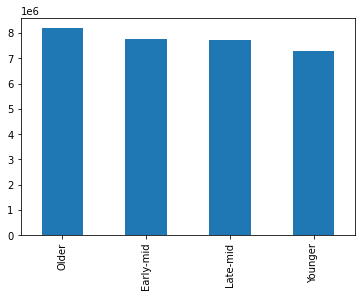

In [19]:
high_cust_df['age_category'].value_counts().plot.bar()

In [20]:
# Quick sanity-check of dataframe shape.

In [21]:
high_cust_df.shape

(30964564, 34)

### Step 5.1.3:  Exploring num_dependents (number of dependents).  Very even splits with none over three, which seems artificial.

In [22]:
high_cust_df['num_dependents'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: num_dependents, dtype: int64

### Step 5.1.4:  Exploring fam_status ("family status").  Purchases by Married people far outnumber those from others.

In [23]:
high_cust_df['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

Text(0, 0.5, 'Count')

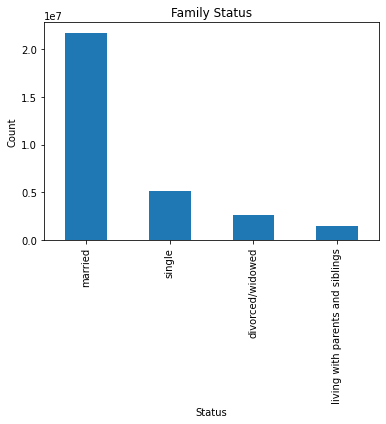

In [24]:
fam_status_bar = high_cust_df['fam_status'].value_counts().plot.bar()
# set the title and axis labels
plt.title('Family Status')
plt.xlabel('Status')
plt.ylabel('Count')

In [25]:
fam_status_bar.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'fam_status_bar.png'), facecolor='white')

### Step 5.1.5:  Exploring income.

In [26]:
high_cust_df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [27]:
# Let's chart income to get a better view.  There seem to be some extra-wealthy outliers.

Text(0.5, 1.0, 'Income of Instacart Users')

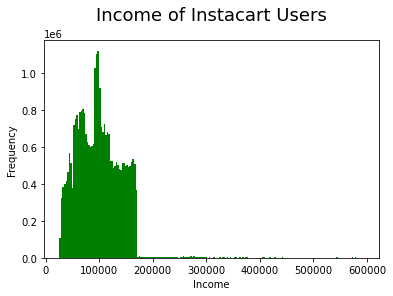

In [28]:
hist_income = high_cust_df['income'].plot.hist(bins = 200, color = 'green')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income of Instacart Users', fontsize = 18, pad=20)

In [29]:
# Save this histogram.

In [30]:
hist_income.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations','income_histogram.png'), facecolor='white')

### Based on the quartiles, I'll create income categories of Lower, Low-mid, Mid-high, and Higher.

In [31]:
list(high_cust_df['income'].quantile([0.25, 0.5, 0.75]))

[67292.0, 96765.0, 128102.0]

In [32]:
high_cust_df.loc[high_cust_df['income'] < 67292, 'income_category'] = 'Lower'
high_cust_df.loc[(high_cust_df['income'] >= 67292) & (high_cust_df['income'] < 96765), 'income_category'] = 'Low-mid'
high_cust_df.loc[(high_cust_df['income'] >= 96765) & (high_cust_df['income'] < 128102), 'income_category'] = 'Mid-high'
high_cust_df.loc[high_cust_df['income'] >= 128102, 'income_category'] = 'Higher'
high_cust_df['income_category'].value_counts()

Mid-high    7742166
Higher      7741261
Lower       7741005
Low-mid     7740132
Name: income_category, dtype: int64

### Step 5.1.6:  Exploring geographic region.  More purchases are made by people in the South, and fewer by those in the Northeast.

In [33]:
high_cust_df['region'].value_counts()

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

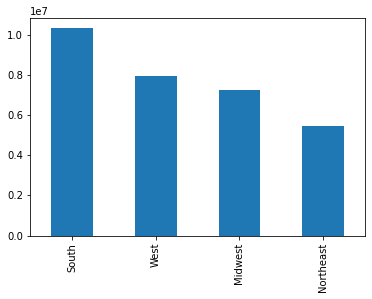

In [34]:
region_bar = high_cust_df['region'].value_counts().plot.bar()

In [104]:
# Save the graph.

In [36]:
fig = plt.gcf()  # get current figure
fig.set_facecolor('white')  # set background color to white
region_bar.figure.savefig(os.path.join(path, '04-Analysis','Visualizations','region_bar.png'))

<Figure size 432x288 with 0 Axes>

### Step 5.2:  Let's cross-tabulate some of these categories for further exploration.

### Step 5.2.1:  Family status with number of dependents.

In [37]:
fam_status_num_dependents_xtab = pd.crosstab(high_cust_df['fam_status'],high_cust_df['num_dependents'],dropna = False)

In [38]:
fam_status_num_dependents_xtab

num_dependents,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


### It is strange that NO divorced/widowed and otherwise single people would have any dependents. 

### Step 5.2.2:  Age category with family status.

In [39]:
age_cat_fam_status_xtab = pd.crosstab(high_cust_df['age_category'],high_cust_df['fam_status'],dropna = False)

In [40]:
age_cat_fam_status_xtab

fam_status,divorced/widowed,living with parents and siblings,married,single
age_category,,,,
Early-mid,0,0,5828125,1927151
Late-mid,623313,0,5754794,1350503
Older,2021958,0,6173586,0
Younger,0,1481172,3987206,1816756


### Apparently, no one gets divorced or widowed *until* Late-middle age, and no one survives *past* Late-middle age unless they have been married.  Hmmm.

### Step 5.2.3:  Age category with number of dependents.  As above, the numbers of dependents look artificially evenly distributed.

In [41]:
age_cat_num_dependents_xtab = pd.crosstab(high_cust_df['age_category'],high_cust_df['num_dependents'],dropna = False)

In [42]:
age_cat_num_dependents_xtab

num_dependents,0,1,2,3
age_category,,,,
Early-mid,1927151,1970358,1922853,1934914
Late-mid,1973816,1908602,1892948,1953244
Older,2021958,2028989,2093847,2050750
Younger,1816756,1811157,1823613,1833608


### Step 5.2.4:  Incorporate department names into customer order data.

In [43]:
# Give a proper column title.

In [44]:
depts_df.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [45]:
depts_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [46]:
# Create a dictionary

In [47]:
depts_map = dict(zip(depts_df["department_id"], depts_df["department"]))
depts_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [48]:
high_cust_df['department'] = high_cust_df['department_id'].map(depts_map)

In [49]:
# Quick sanity-check of dataframe shape.  Note the two additional _category columns so far, followed by 'department'.

In [50]:
high_cust_df.shape

(30964564, 36)

In [51]:
high_cust_df.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,...,age,date_joined,num_dependents,fam_status,income,region,activity,age_category,income_category,department
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,snacks
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,snacks
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,...,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,meat seafood
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,...,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,meat seafood
4,1000,1000,Apricots,18,10,12.9,505689,138,9,6,...,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,bulk


In [52]:
high_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404847
Data columns (total 36 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   product_id              int64  
 2   product_name            object 
 3   aisle_id                int64  
 4   department_id           int64  
 5   prices                  float64
 6   order_id                int64  
 7   customer_id             int64  
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  price_range             object 
 15  price_range_loc         object 
 16  busiest_days            object 
 17  busiest_hours           object 
 18  max_order               int64  
 19  loyalty_flag            object 
 20  avg_order               float64
 21  spending_flag           objec

In [53]:
high_cust_df['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Step 5.2.5:  Identify demographic 'parents-with-infants' based on dependents and purchases from 'babies' department.  FAILED.

In [54]:
# Sanity check:  does anyone without dependents buy from 'babies'?  Someone who is expecting, perhaps?

In [55]:
num_dependents_vs_depts_xtab = pd.crosstab(high_cust_df['num_dependents'],high_cust_df['department'],dropna = False)

In [56]:
num_dependents_vs_depts_xtab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
num_dependents,,,,,,,,,,,,,,,,,,,,,
0,36827,103328,281395,645341,166432,8000,251020,1294376,253382,204296,...,171358,64461,165878,15935,8714,443904,106205,23602,2275441,690438
1,35799,99905,280390,638747,169242,8573,253013,1297659,247893,204798,...,175708,64753,169256,16013,8720,446087,105971,23815,2258458,688357
2,34668,104574,279221,646886,167854,8475,252716,1288883,249967,204630,...,176507,63304,168224,16385,8600,446558,105815,22501,2257655,695812
3,37333,102585,279822,640927,167322,8403,255325,1296264,252592,208412,...,176284,63473,171423,16435,8377,446156,106315,23142,2287719,691799


In [57]:
num_dependents_vs_depts_xtab['babies']

num_dependents
0    103328
1     99905
2    104574
3    102585
Name: babies, dtype: int64

### It seems the number of dependents appears to have no obvious relationship to purchases in various departments, not even 'babies'.  The data seems suspect.
### Number of dependents does not even have an obvious impact on the purchase day of the week, below.

In [58]:
num_dependents_vs_dow_xtab = pd.crosstab(high_cust_df['num_dependents'],high_cust_df['orders_day_of_week'],dropna = False)

In [59]:
num_dependents_vs_dow_xtab

orders_day_of_week,0,1,2,3,4,5,6
num_dependents,,,,,,,
0,1477078,1362350,1002581,917042,905259,1014174,1061197
1,1469376,1347679,998275,911972,908230,1007299,1076275
2,1472719,1338837,1004790,921774,907389,1011157,1076595
3,1489437,1362820,1019060,918747,904116,1001099,1077237


### Step 5.2.6:  Maybe we can identify demographic trends with purchases from the 'alcohol' and/or 'pets' departments.

#### Exploring alcohol, first.

Crosstab of alcohol purchases vs.  num_dependents
num_dependents
0    36827
1    35799
2    34668
3    37333
Name: alcohol, dtype: int64


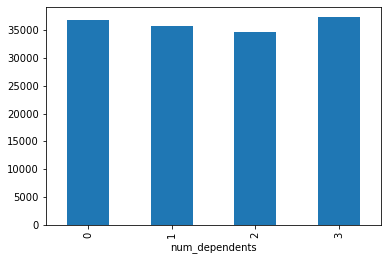


Crosstab of alcohol purchases vs.  fam_status
fam_status
divorced/widowed                    11859
living with parents and siblings     8379
married                             99421
single                              24968
Name: alcohol, dtype: int64


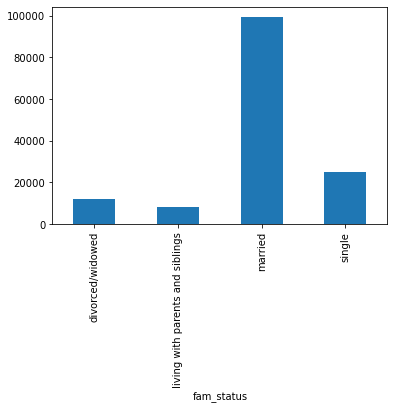


Crosstab of alcohol purchases vs.  region
region
Midwest      34043
Northeast    25017
South        48813
West         36754
Name: alcohol, dtype: int64


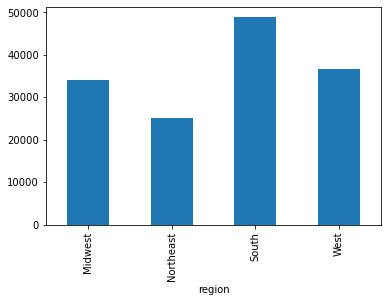


Crosstab of alcohol purchases vs.  gender
gender
Female    74844
Male      69783
Name: alcohol, dtype: int64


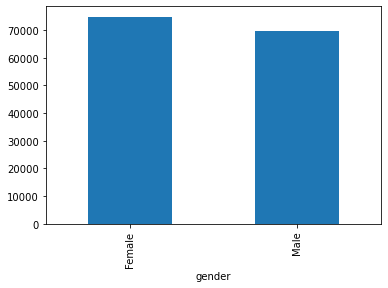


Crosstab of alcohol purchases vs.  age_category
age_category
Early-mid    36016
Late-mid     36524
Older        36693
Younger      35394
Name: alcohol, dtype: int64


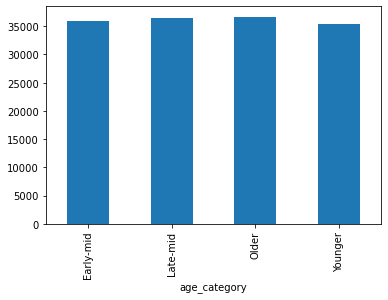


Crosstab of alcohol purchases vs.  income_category
income_category
Higher      40862
Low-mid     33301
Lower       36825
Mid-high    33639
Name: alcohol, dtype: int64


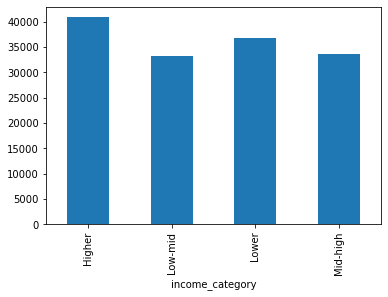


Crosstab of alcohol purchases vs.  orders_day_of_week
orders_day_of_week
0    16176
1    19400
2    19223
3    21197
4    24815
5    25812
6    18004
Name: alcohol, dtype: int64


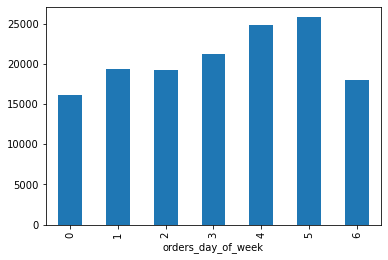


Crosstab of alcohol purchases vs.  order_hour_of_day
order_hour_of_day
0       465
1       293
2       246
3       177
4       175
5       260
6       645
7      2021
8      5046
9      9831
10    12694
11    13020
12    12521
13    13221
14    14140
15    14263
16    13455
17    11328
18     8251
19     5467
20     3149
21     1819
22     1318
23      822
Name: alcohol, dtype: int64


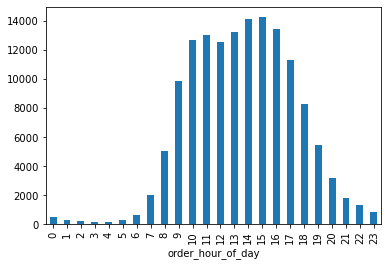

In [60]:
for column_name in 'num_dependents', 'fam_status', 'region', 'gender', 'age_category', 'income_category', 'orders_day_of_week', 'order_hour_of_day':
    dept_vs_demographics_xtab = pd.crosstab(high_cust_df[column_name],high_cust_df['department'],dropna = False)
    print ("Crosstab of alcohol purchases vs. ", column_name)
    print (dept_vs_demographics_xtab['alcohol'])
    alcohol_demo_xtab = pd.crosstab(high_cust_df[column_name],high_cust_df['department'],dropna = False)['alcohol'].plot.bar()
    fig = plt.gcf()  # get current figure
    fig.set_facecolor('white')  # set background color to white
    plt.savefig(os.path.join(path, '04-Analysis','Visualizations', f'bar_alcohol_v_{column_name}.png'))
    plt.show()
    print ()

### Observations:
### Married people buy a lot more alcohol than any other family status, which matches the trend for total purchases.
### Customers in the South buy more alcohol, while those in the Northeast buy less, which matches the trend for total purchases.
### Younger adults buy slightly less alcohol; other age groups are nearly even.
### Lower-income customers bought more alcohol than either Low-mid or Mid-high income customers, but Higher-income customers bought the most.
### Alcohol sales are significantly higher on Thursdays and Wednesdays.
### Typical office hours are the busiest for alcohol sales.

#### Exploring pet-related purchases, next.

Crosstab of pet-related purchases vs.  num_dependents
num_dependents
0    23602
1    23815
2    22501
3    23142
Name: pets, dtype: int64


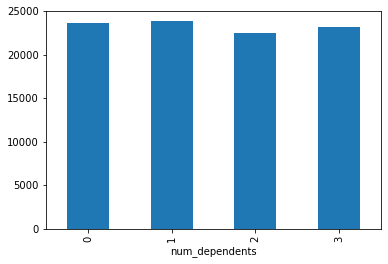


Crosstab of pet-related purchases vs.  fam_status
fam_status
divorced/widowed                     8025
living with parents and siblings     5338
married                             64120
single                              15577
Name: pets, dtype: int64


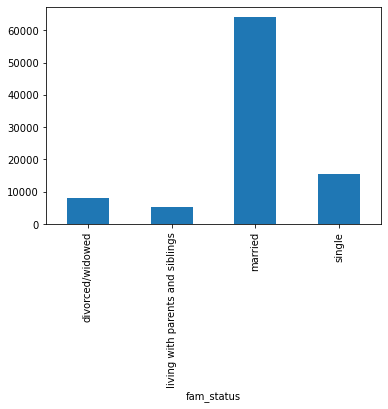


Crosstab of pet-related purchases vs.  region
region
Midwest      21358
Northeast    17734
South        29909
West         24059
Name: pets, dtype: int64


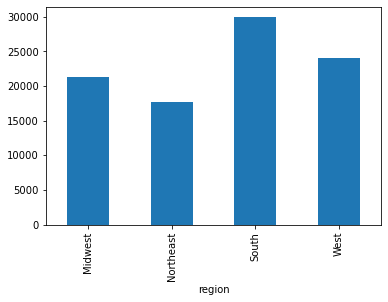


Crosstab of pet-related purchases vs.  gender
gender
Female    45367
Male      47693
Name: pets, dtype: int64


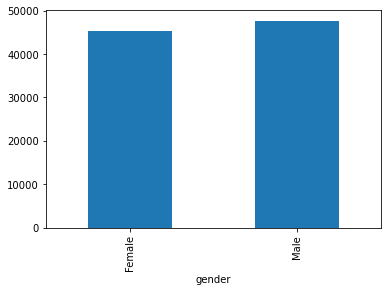


Crosstab of pet-related purchases vs.  age_category
age_category
Early-mid    22676
Late-mid     22784
Older        25115
Younger      22485
Name: pets, dtype: int64


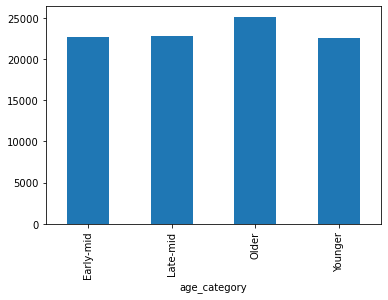


Crosstab of pet-related purchases vs.  income_category
income_category
Higher      24944
Low-mid     22213
Lower       21751
Mid-high    24152
Name: pets, dtype: int64


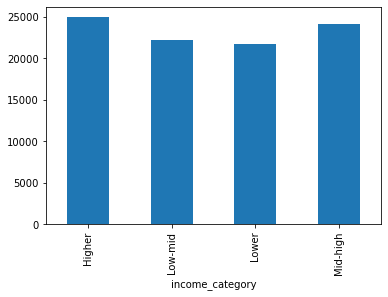


Crosstab of pet-related purchases vs.  orders_day_of_week
orders_day_of_week
0    16257
1    13851
2    11437
3    11971
4    11889
5    13018
6    14637
Name: pets, dtype: int64


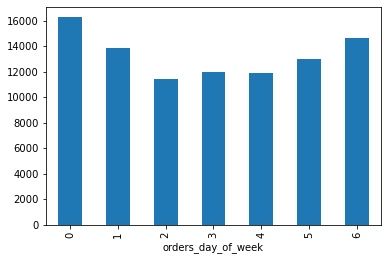


Crosstab of pet-related purchases vs.  order_hour_of_day
order_hour_of_day
0      642
1      416
2      247
3      252
4      269
5      302
6      948
7     2389
8     4298
9     6087
10    7194
11    7493
12    7637
13    7553
14    7534
15    7519
16    7750
17    7037
18    5913
19    4496
20    2847
21    1912
22    1375
23     950
Name: pets, dtype: int64


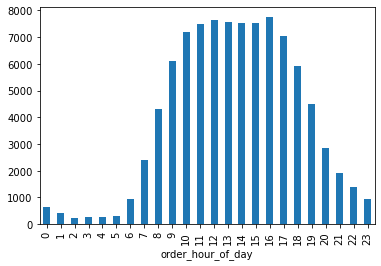

In [61]:
for column_name in 'num_dependents', 'fam_status', 'region', 'gender', 'age_category', 'income_category', 'orders_day_of_week', 'order_hour_of_day':
    dept_vs_demographics_xtab = pd.crosstab(high_cust_df[column_name],high_cust_df['department'],dropna = False)
    print ("Crosstab of pet-related purchases vs. ", column_name)
    print (dept_vs_demographics_xtab['pets'])
    pets_demo_xtab = pd.crosstab(high_cust_df[column_name],high_cust_df['department'],dropna = False)['pets'].plot.bar()
    fig = plt.gcf()  # get current figure
    fig.set_facecolor('white')  # set background color to white
    plt.savefig(os.path.join(path, '04-Analysis','Visualizations', f'bar_pets_v_{column_name}.png'))
    plt.show()
    print ()

### Observations:
### As with alcohol, married people make many more pet-related purchases than any other family status, which matches the trend for total purchases.
### As with alcohol, customers in the South make more pet-related purchases, while those in the Northeast make fewer, which matches the trend for total purchases.
### Older adults make slightly fewer pet-related purchases; other age groups are nearly even.
### Pet-related purchases increase slightly with income bracket.
### In contrast to alcohol purchases, pet-related purchases are most common at the very beginning and end of the week.
### Typical office hours are the busiest for pet-related purchases.

### Step 5.2.7:  Do *any* demographics affect the  purchases of "baby" products?

Crosstab of baby products purchases vs.  num_dependents
num_dependents
0    103328
1     99905
2    104574
3    102585
Name: babies, dtype: int64


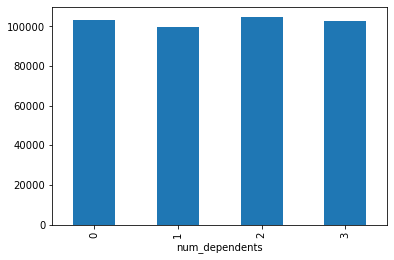


Crosstab of baby products purchases vs.  fam_status
fam_status
divorced/widowed                     34351
living with parents and siblings     19381
married                             287683
single                               68977
Name: babies, dtype: int64


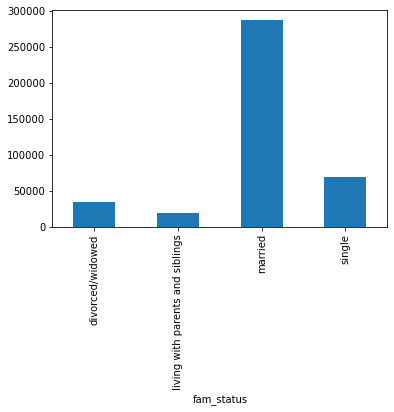


Crosstab of baby products purchases vs.  region
region
Midwest       95741
Northeast     72712
South        139511
West         102428
Name: babies, dtype: int64


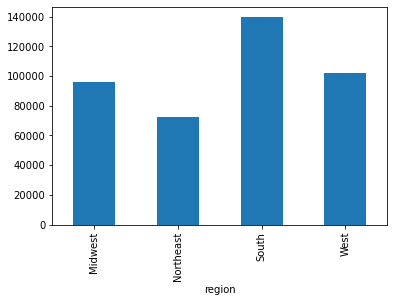


Crosstab of baby products purchases vs.  gender
gender
Female    200641
Male      209751
Name: babies, dtype: int64


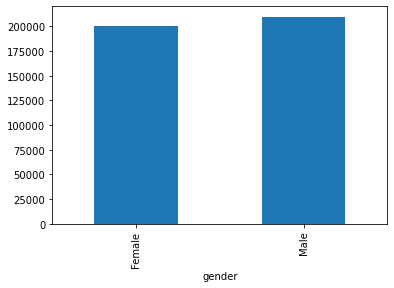


Crosstab of baby products purchases vs.  age_category
age_category
Early-mid    105952
Late-mid     103151
Older        106204
Younger       95085
Name: babies, dtype: int64


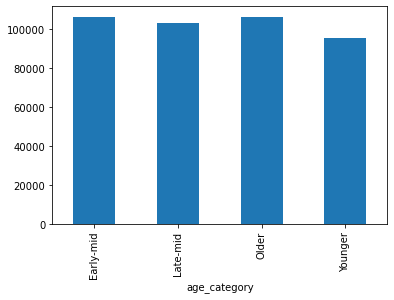


Crosstab of baby products purchases vs.  income_category
income_category
Higher      105674
Low-mid     111588
Lower        83835
Mid-high    109295
Name: babies, dtype: int64


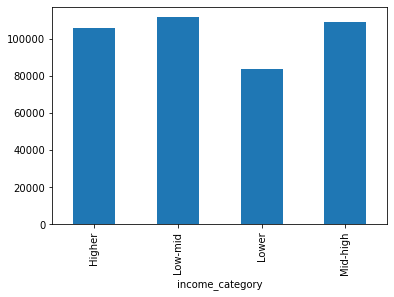


Crosstab of baby products purchases vs.  orders_day_of_week
orders_day_of_week
0    78926
1    70692
2    54979
3    50731
4    49949
5    49870
6    55245
Name: babies, dtype: int64


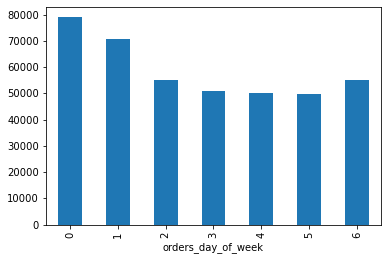


Crosstab of baby products purchases vs.  order_hour_of_day
order_hour_of_day
0      2317
1      1085
2       616
3       457
4       534
5      1076
6      4794
7     16310
8     28008
9     33483
10    33241
11    30790
12    29783
13    32432
14    33184
15    31893
16    29107
17    22527
18    18003
19    15517
20    15492
21    14333
22    10177
23     5233
Name: babies, dtype: int64


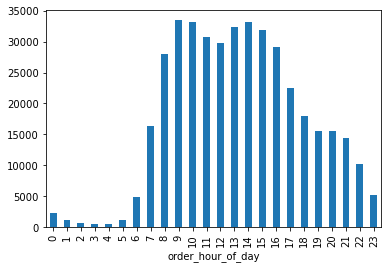

In [62]:
for column_name in 'num_dependents', 'fam_status', 'region', 'gender', 'age_category', 'income_category', 'orders_day_of_week', 'order_hour_of_day':
    dept_vs_demographics_xtab = pd.crosstab(high_cust_df[column_name],high_cust_df['department'],dropna = False)
    print ("Crosstab of baby products purchases vs. ", column_name)
    print (dept_vs_demographics_xtab['babies'])
    alcohol_demo_xtab = pd.crosstab(high_cust_df[column_name],high_cust_df['department'],dropna = False)['babies'].plot.bar()
    fig = plt.gcf()  # get current figure
    fig.set_facecolor('white')  # set background color to white
    plt.savefig(os.path.join(path, '04-Analysis','Visualizations', f'bar_baby_products_v_{column_name}.png'))
    plt.show()
    print ()

### Observations:
### As with alcohol and pet products, married people make many more baby-related purchases than any other family status, which matches the trend for total purchases.
### As with alcohol and pet products, customers in the South make more baby-related purchases, while those in the Northeast make fewer, which matches the trend for total purchases.
### As with alcohol, surprisingly (but not for this dataset!), younger adults make slightly fewer baby-related purchases; other age groups are nearly even, with older adults (65 and older) making the most!
### Lower-income customers make noticeably fewer baby-related purchases, but otherwise it is unclear what role income plays.
### Baby-related purchases are most common on Saturdays and Sundays.
### Typical office hours are the busiest for baby-related purchases.

## Step 6:  Create an appropriate visualization to show the distribution of profiles.

### Given the clearly artificial nature of some of this data - particularly around numbers of dependents and purchaes of baby products - it is difficult to determine demographic profiles that are both plausible and distinct.
### However, for purposes of this exercise, I will imagine that two demographics are:
### 1) Married people living in the South, since most purchases are made by people in those groups.
### 2) People living with parents and siblings in the Northeast, since the fewest purchases are made by people with those two demographics.

In [63]:
high_cust_df['target_demo'] = 'Other'
high_cust_df.loc[(high_cust_df['fam_status'] == 'married') & (high_cust_df['region'] == 'South'), 'target_demo'] = 'Married-South'
high_cust_df.loc[(high_cust_df['fam_status'] == 'living with parents and siblings') & (high_cust_df['region'] == 'Northeast'), 'target_demo'] = 'LPS-Northeast'

In [64]:
high_cust_df['target_demo'].value_counts(dropna = False)

Other            23484385
Married-South     7223749
LPS-Northeast      256430
Name: target_demo, dtype: int64

<AxesSubplot:ylabel='target_demo'>

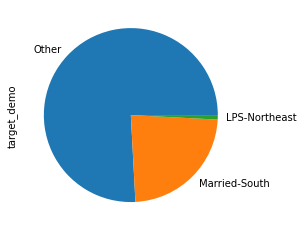

In [65]:
high_cust_df['target_demo'].value_counts(dropna = False).plot.pie()

In [66]:
high_cust_df.shape

(30964564, 37)

In [67]:
high_cust_df.groupby('target_demo').get_group('Married-South')['department'].value_counts()

produce            2122757
dairy eggs         1205946
snacks              638784
beverages           600691
frozen              496617
pantry              416459
bakery              260333
canned goods        236855
deli                231515
dry goods pasta     192501
household           162392
meat seafood        158238
breakfast           156792
personal care       100229
babies               97595
international        59269
alcohol              34400
pets                 21199
missing              15388
other                 8015
bulk                  7774
Name: department, dtype: int64

<AxesSubplot:ylabel='department'>

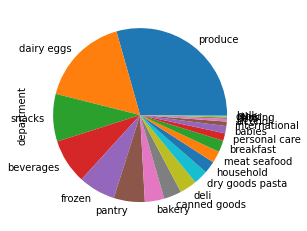

In [68]:
high_cust_df.groupby('target_demo').get_group('Married-South')['department'].value_counts().plot.pie()

<AxesSubplot:ylabel='department'>

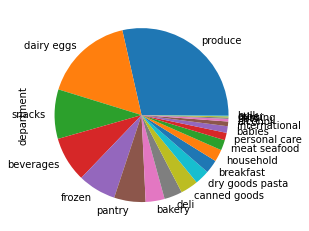

In [69]:
high_cust_df.groupby('target_demo').get_group('LPS-Northeast')['department'].value_counts().plot.pie()

<AxesSubplot:ylabel='department'>

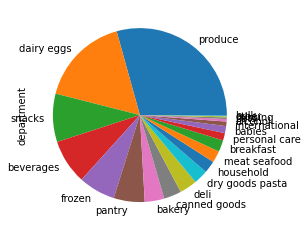

In [70]:
high_cust_df.groupby('target_demo').get_group('Other')['department'].value_counts().plot.pie()

## The pie charts are too squished, and it would be better if we could compare the profiles side-by-side.
## Generate side-by-side bar graphs of the per-department purchase ratios, instead.

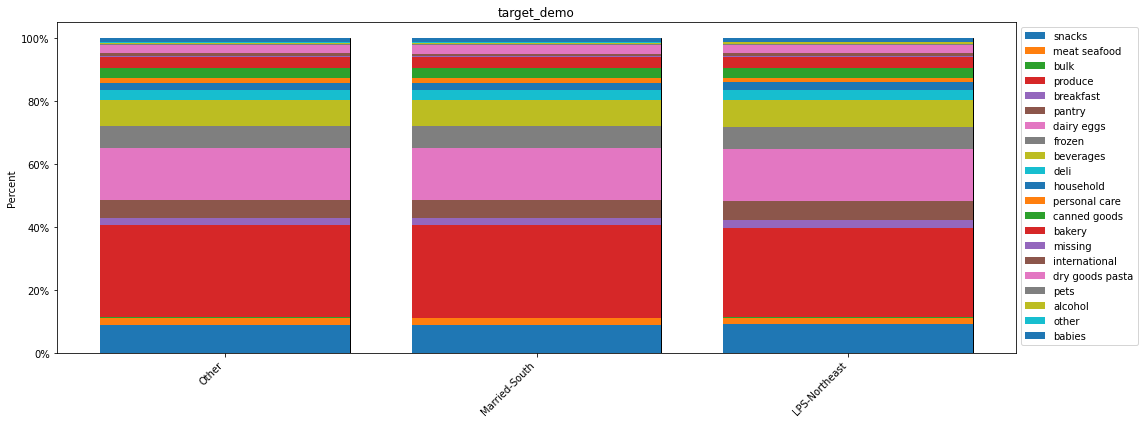

In [71]:
# define the column(s) to evaluate
demo_columns = ['target_demo']

# set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# loop over the columns
for i, col_name in enumerate(demo_columns):
    # get the unique values of the column
    values = high_cust_df[col_name].unique()
    
    # calculate the percentage of each department for each value
    percentages = []
    for value in values:
        slice = high_cust_df.loc[high_cust_df[col_name] == value]
        grouped = slice.groupby('department').size()
        percentages.append(grouped / grouped.sum() * 100)

    # create a stacked bar chart
    ax = plt.subplot(len(demo_columns), 1, i+1)
    ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
    bottom = np.zeros(len(values))
    for j, dept in enumerate(high_cust_df['department'].unique()):
        ax.bar(range(len(values)), [x.get(dept, 0) for x in percentages], bottom=bottom, label=dept)
        bottom += [x.get(dept, 0) for x in percentages]

    # set the x and y axis labels, and the title
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(values, rotation=45, ha='right')
    ax.set_ylabel('Percent')
    ax.set_title(col_name)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

# set the layout and display the figure
plt.tight_layout()
plt.show()


### Observation:  As different as the profiles would seem to be, they show no difference in department preferences.

In [72]:
# Save our modified high_cust_df to a NEW, TENTATIVE file until we decide how best to proceed.
high_cust_df.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'high_cust_df_three_more_columns.pkl'))

## Step 7:  Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [73]:
#show all columns
pd.set_option('display.max_columns', None)

In [74]:
high_cust_df.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_days,busiest_hours,max_order,loyalty_flag,avg_order,spending_flag,avg_order_frequency,frequency_flag,gender,state,age,date_joined,num_dependents,fam_status,income,region,activity,age_category,income_category,department,target_demo
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Busiest hours,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,snacks,Other
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,snacks,Other
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,0.0,4,0,High range,High-range product,Regularly busy,Regularly busy,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,meat seafood,Other
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,High range,High-range product,Regularly busy,Regularly busy,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,meat seafood,Other
4,1000,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,32,Regular customer,6.935811,Low spender,9.837838,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high,Older,Lower,bulk,Other


### Why do the example student submissions use 'add_to_cart_order' for aggregations?  It makes no sense.
### For that matter, why are there 256 orders with more than 99 items?  More artificial "data," I presume.

In [79]:
high_cust_df.groupby('target_demo').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order           
                   mean  min   max                   mean  min   max
target_demo                                                         
LPS-Northeast  7.754427  1.0  25.0               9.983079  0.0  30.0
Married-South  7.793489  1.0  25.0              10.234200  0.0  30.0
Other          7.790094  1.0  25.0              10.231820  0.0  30.0

In [80]:
demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
for col_name in demo_columns:
    print (high_cust_df.groupby(col_name).agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']}))

                 prices            days_since_prior_order           
                   mean  min   max                   mean  min   max
target_demo                                                         
LPS-Northeast  7.754427  1.0  25.0               9.983079  0.0  30.0
Married-South  7.793489  1.0  25.0              10.234200  0.0  30.0
Other          7.790094  1.0  25.0              10.231820  0.0  30.0
                    prices            days_since_prior_order           
                      mean  min   max                   mean  min   max
loyalty_flag                                                           
Loyal customer    7.773575  1.0  25.0               5.916068  0.0  30.0
New customer      7.801665  1.0  25.0              15.116671  0.0  30.0
Regular customer  7.798262  1.0  25.0              11.546425  0.0  30.0
                 prices            days_since_prior_order           
                   mean  min   max                   mean  min   max
spending_flag   

## Step 8:  Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### There are no links between any of the profiles and any departments or regions (other than the regions that are part of the profile definitions, of course).
### In fact, there are virtually no noticeable links between any demographic attributes and purchasing behaviors.  Below are some graphs which drive this point home.

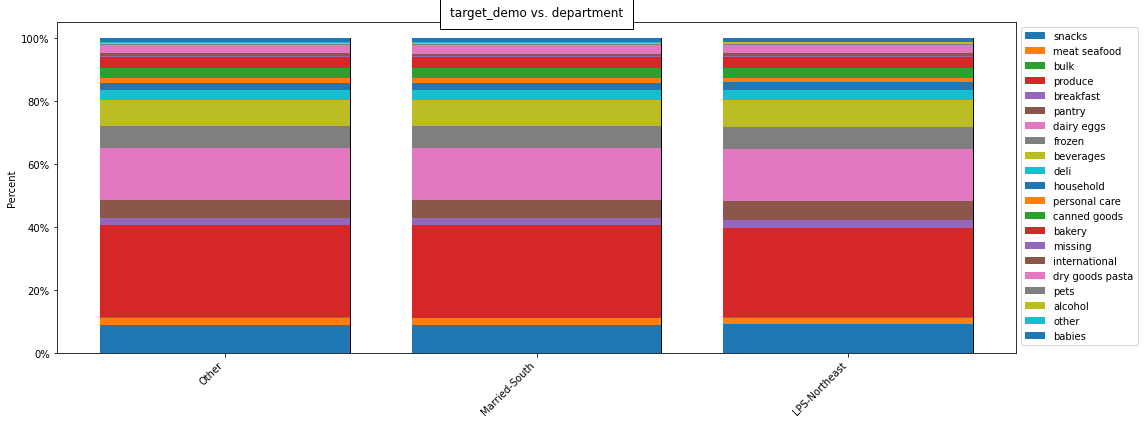

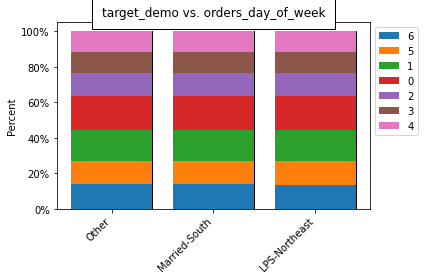

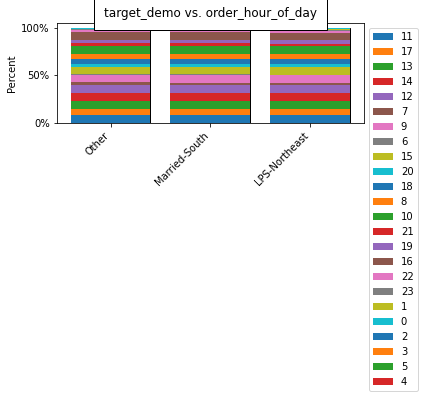

/tmp/ipykernel_2702/845547690.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


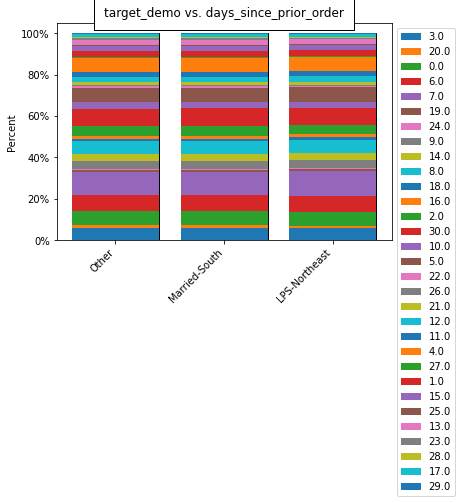

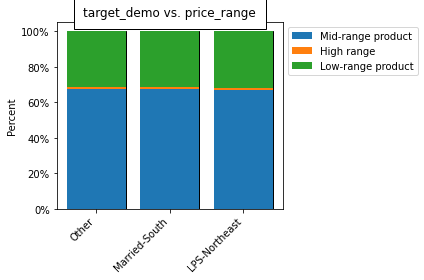

In [81]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['target_demo']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


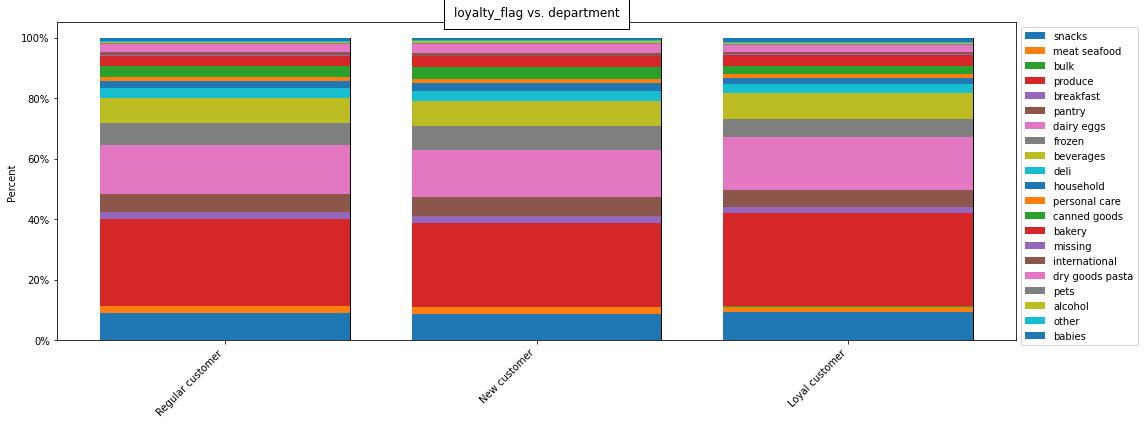

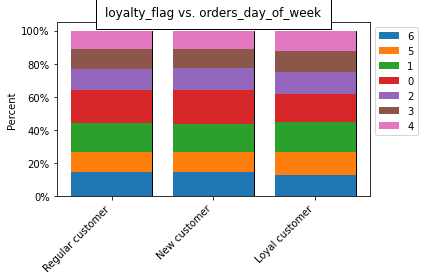

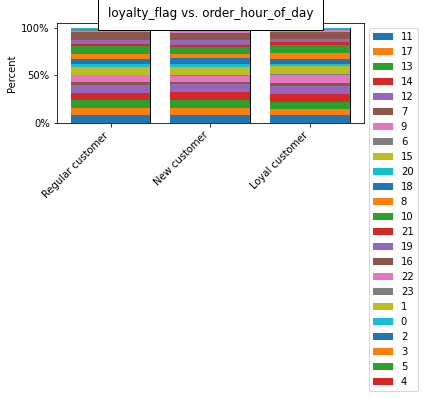

/tmp/ipykernel_2702/3438912871.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


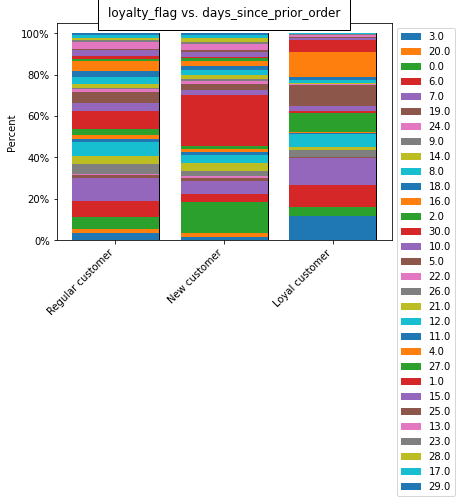

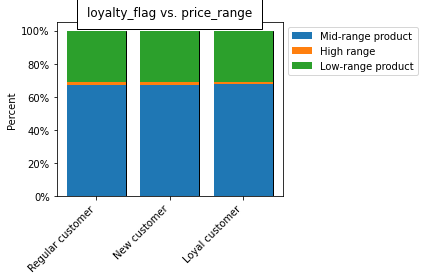

In [82]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['loyalty_flag']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


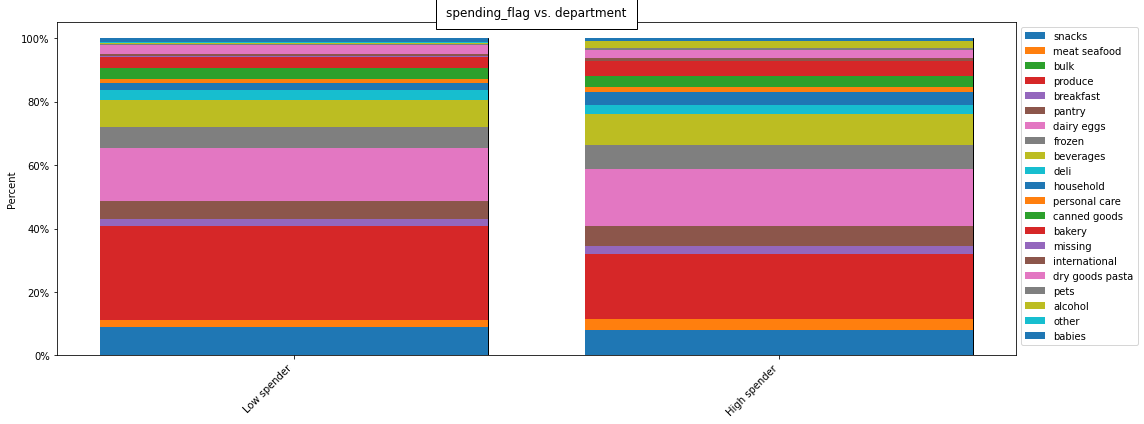

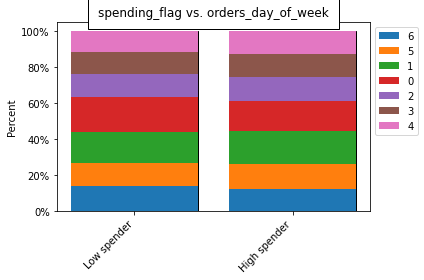

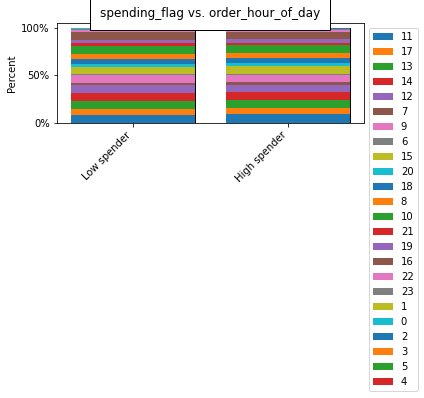

/tmp/ipykernel_2702/1457595777.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


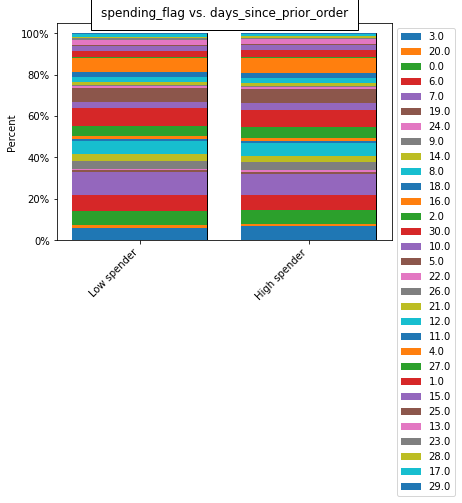

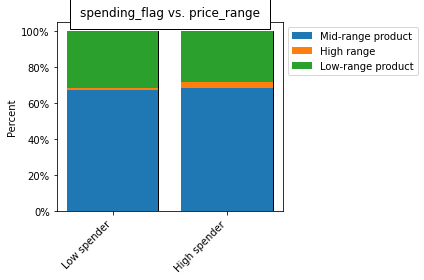

In [83]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['spending_flag']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


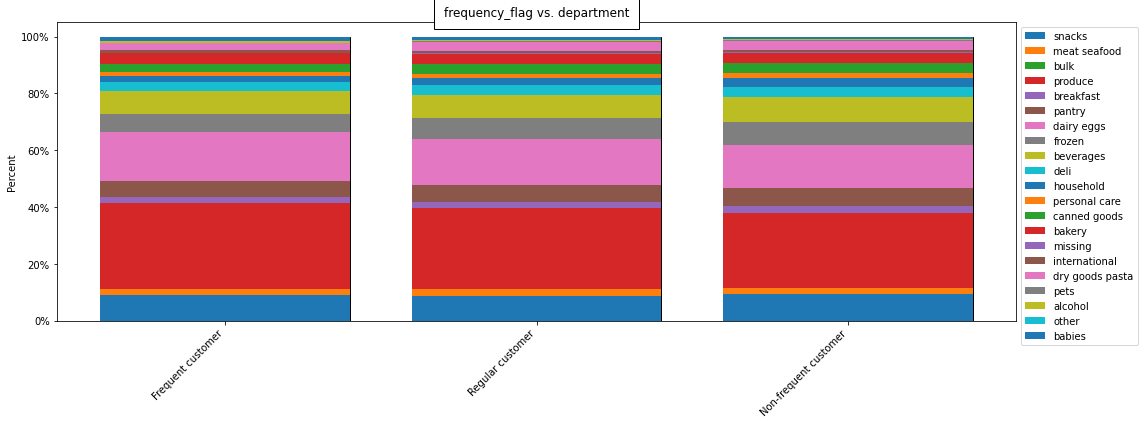

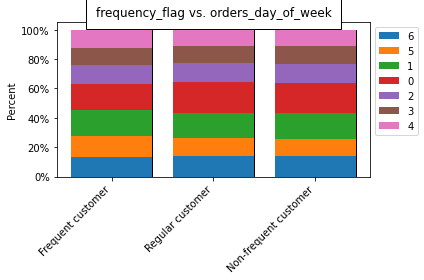

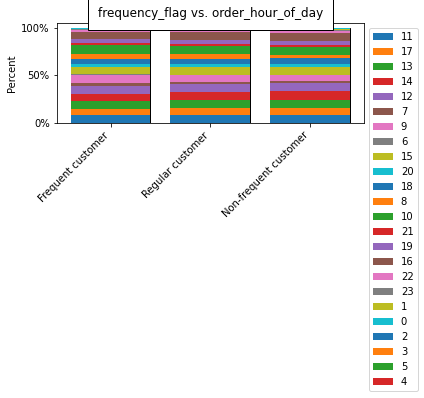

/tmp/ipykernel_2702/410935734.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


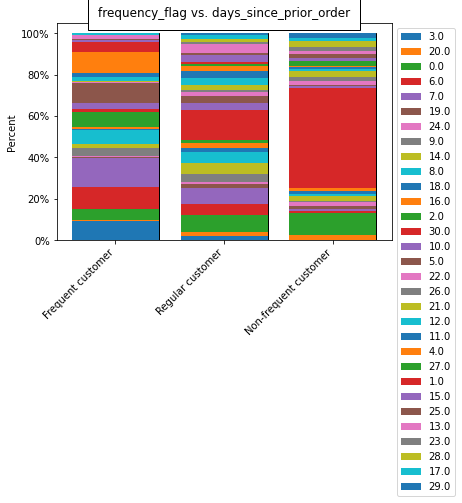

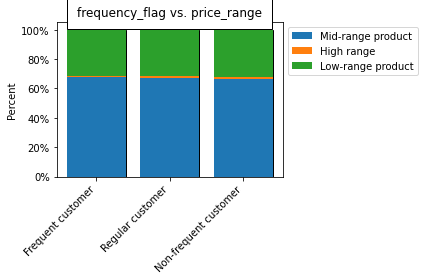

In [84]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['frequency_flag']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


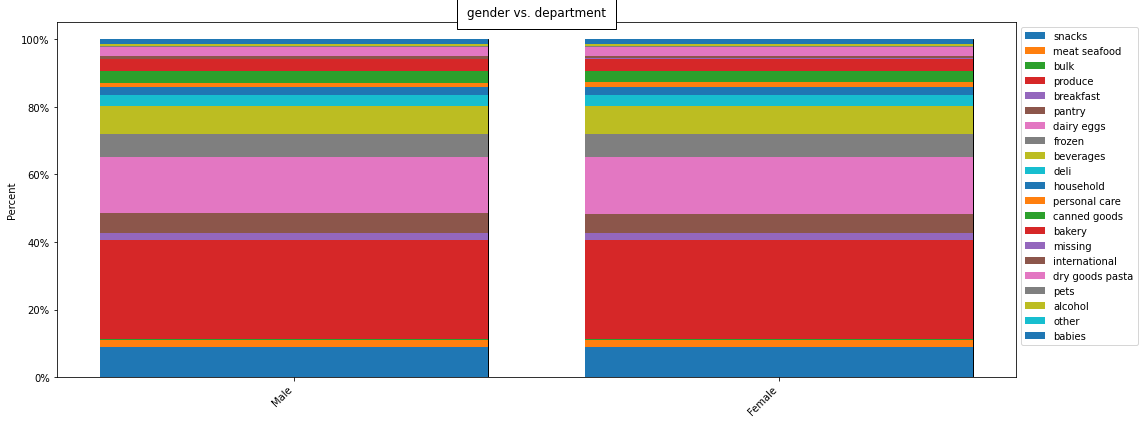

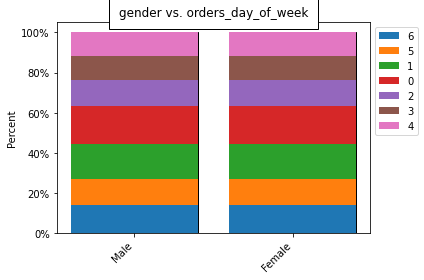

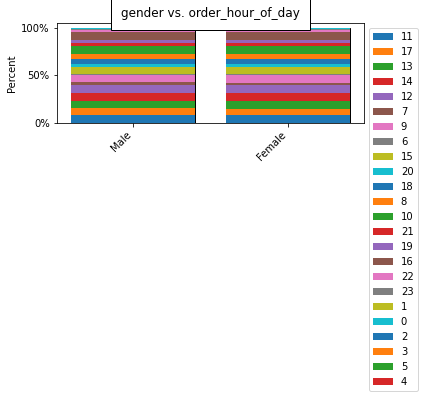

/tmp/ipykernel_2702/329247000.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


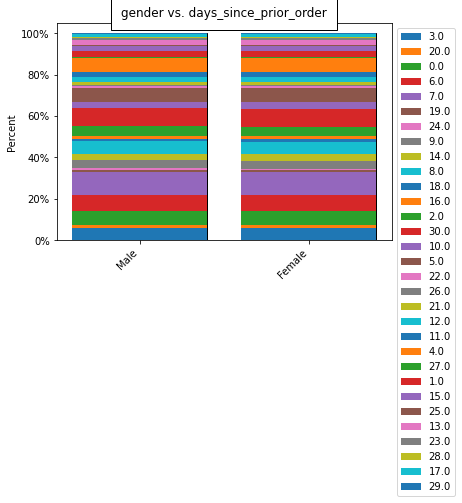

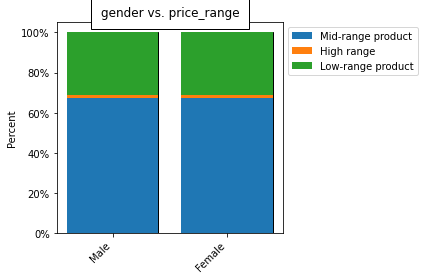

In [85]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['gender']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


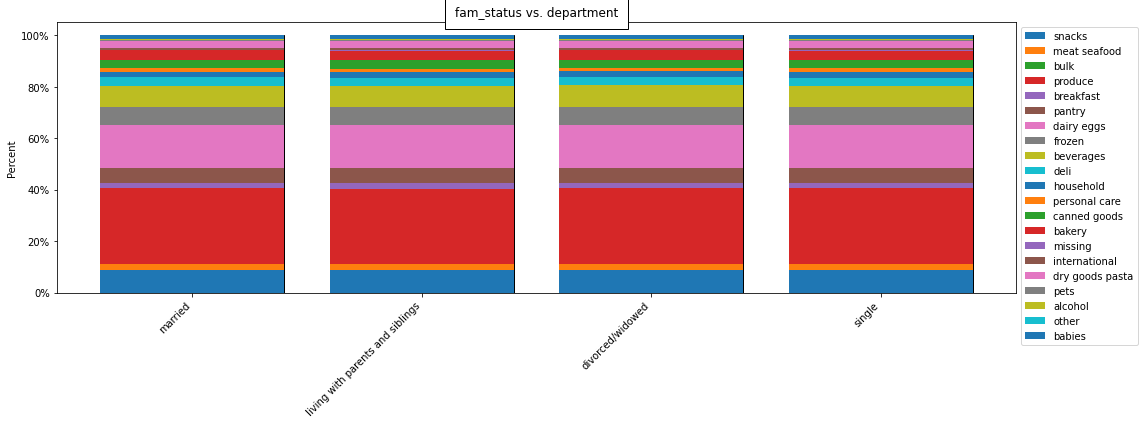

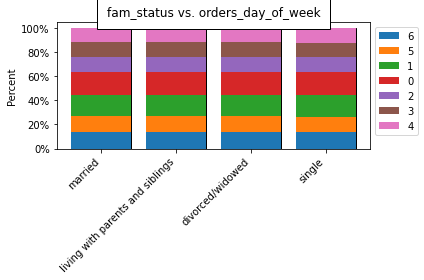

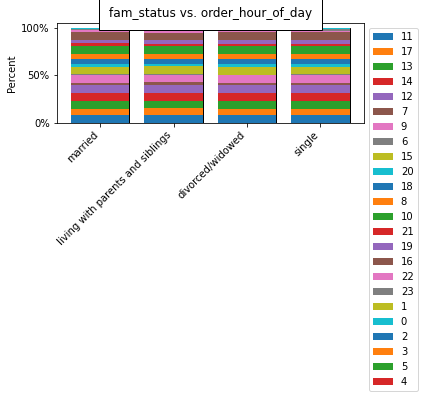

/tmp/ipykernel_2702/2800931591.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


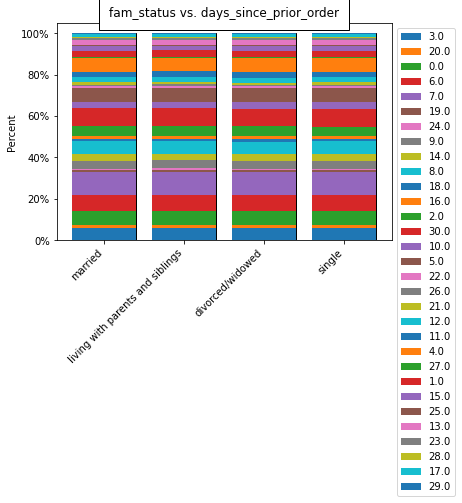

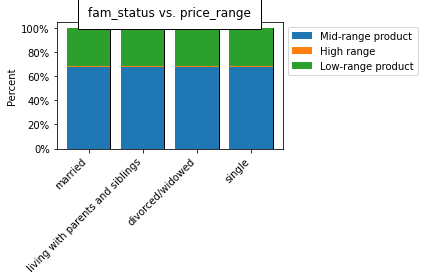

In [86]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['fam_status']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


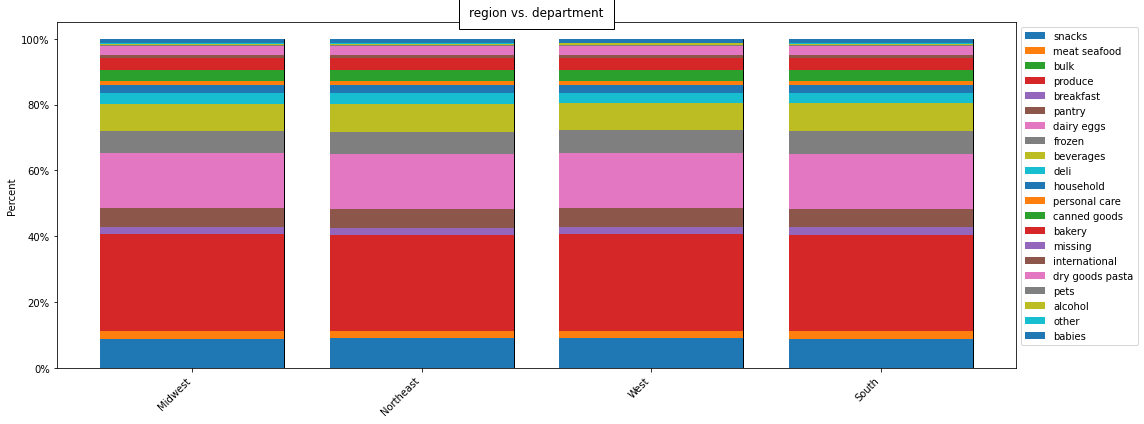

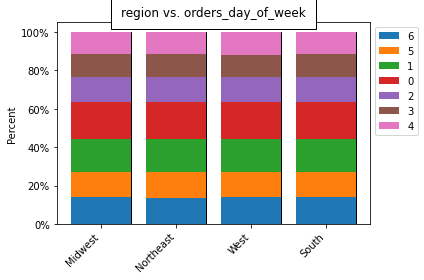

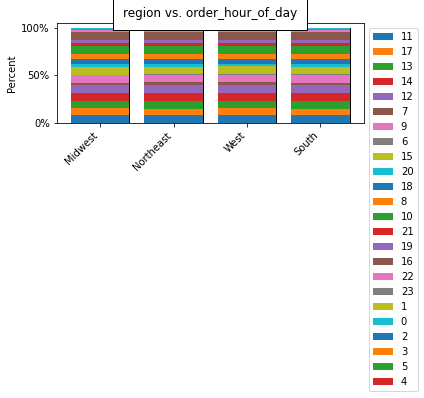

/tmp/ipykernel_2702/3002605874.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


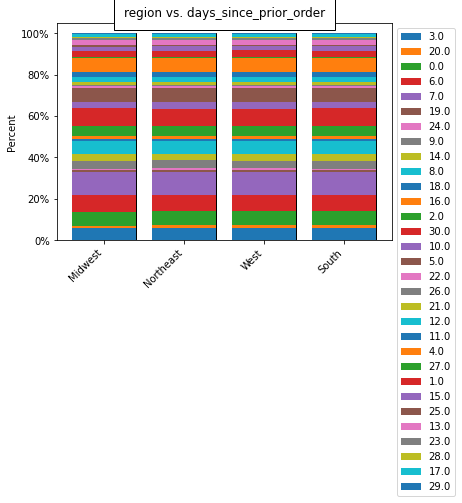

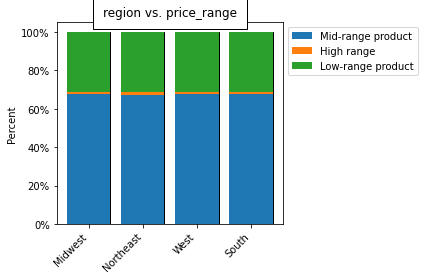

In [87]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['region']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


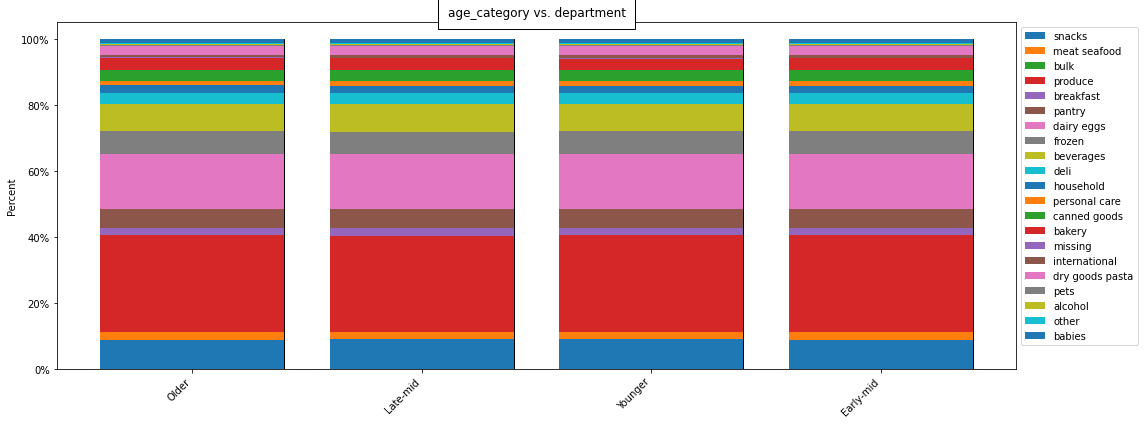

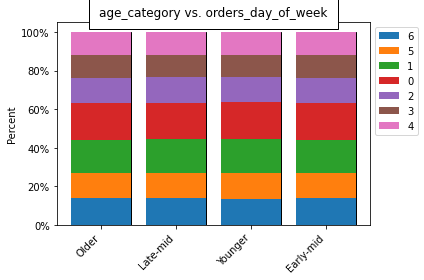

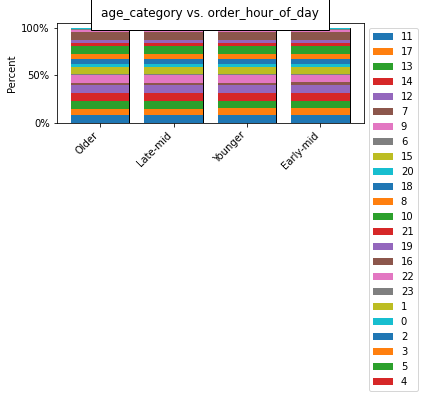

/tmp/ipykernel_2702/3349394502.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


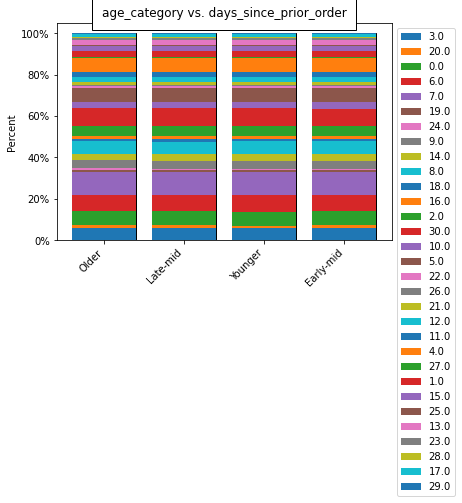

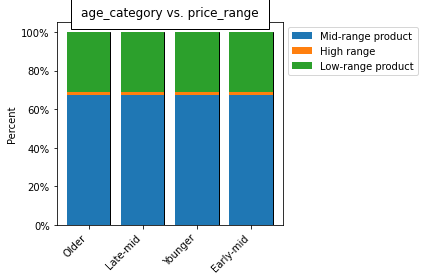

In [88]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['age_category']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


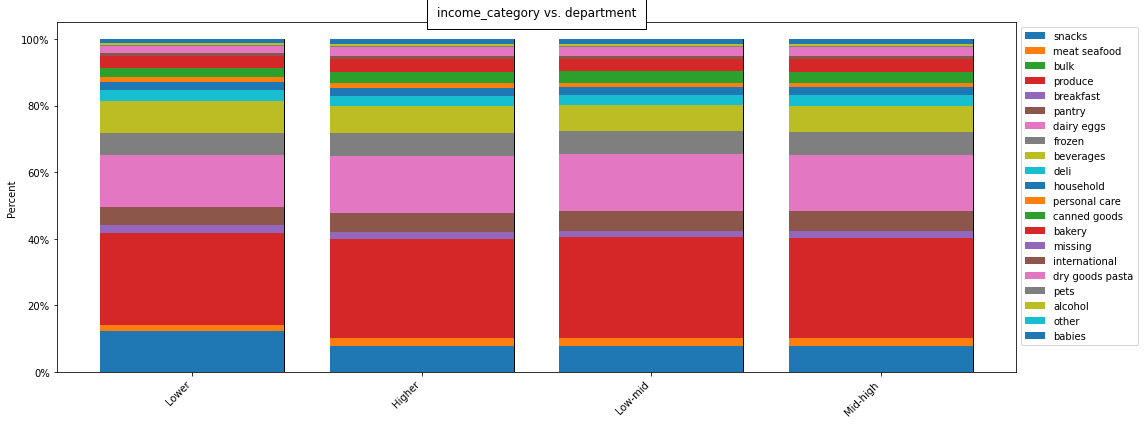

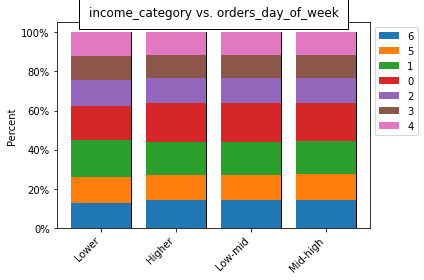

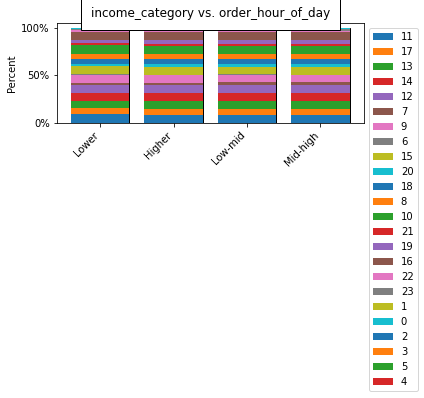

/tmp/ipykernel_2702/603485854.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


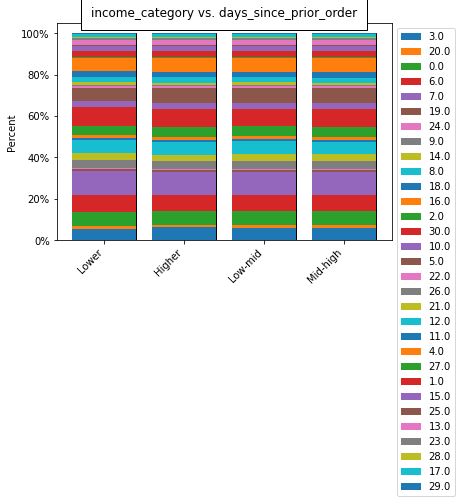

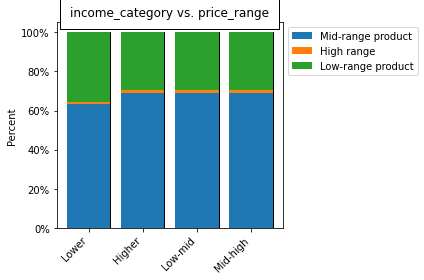

In [89]:
# Define the demographic column(s) to evaluate
#demo_columns = ['target_demo', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'gender', 'fam_status', 'region', 'age_category', 'income_category']
## I can only get the graphs to display properly for the first of these columns, so until I either understand matplotlib
## better, or learn how to build and use functions, I'm forced to copy-paste this code for each of these columns. :(
demo_columns = ['income_category']

# Define the purchase behavior columns to evaluate
purchase_columns = ['department', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'price_range']
#purchase_columns = ['price_range']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a stacked bar chart
        #ax = plt.subplot(len(demo_columns), 1, i+1)
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.bar(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        bottom = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.bar(range(len(values)), [x.get(purchase, 0) for x in percentages], bottom=bottom, label=purchase)
            bottom += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(values, rotation=45, ha='right')
        ax.set_ylabel('Percent')
        ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', edgecolor='black', pad=10))
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()


## Addendum:  Additional graphs for spreadsheet, addressing the questions posed in the Project Brief.

Text(0.5, 0, 'Day of Week (0 = Saturday, 1 = Sunday)')

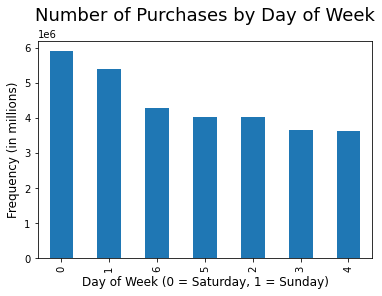

In [90]:
# Busiest days of the week, in terms of numbers of orders placed, are Days 0 (Saturday) and 1 (Sunday).
bar_orders_by_day_of_week = high_cust_df['orders_day_of_week'].value_counts().plot.bar()
plt.title('Number of Purchases by Day of Week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week (0 = Saturday, 1 = Sunday)',  fontsize = 12)

In [91]:
# Save graph
bar_orders_by_day_of_week.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'bar_orders_by_day_of_week.png'), facecolor='white')

Text(0.5, 0, 'Hour of Day')

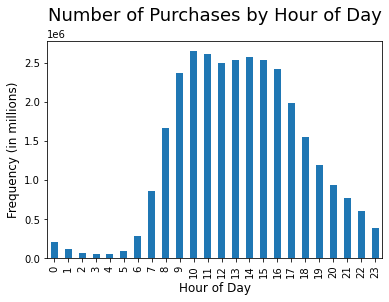

In [92]:
# Busiest hours of the day, in terms of numbers of orders placed.
bar_orders_by_hour_of_day = high_cust_df['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Number of Purchases by Hour of Day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Hour of Day',  fontsize = 12)

In [93]:
# Save graph
bar_orders_by_hour_of_day.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'bar_orders_by_hour_of_day.png'), facecolor='white')

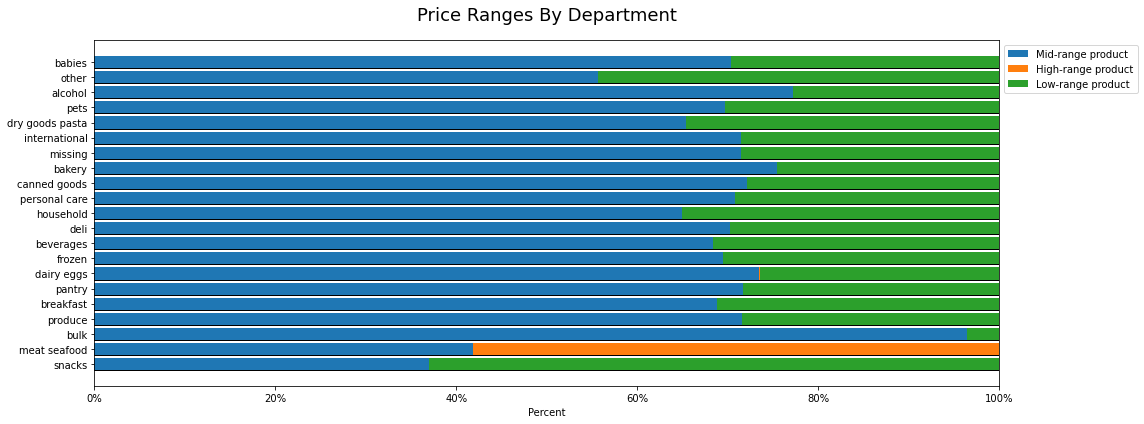

In [94]:
demo_columns = ['department']

# Define the purchase behavior columns to evaluate
purchase_columns = ['price_range_loc']

# Set the figure size
plt.figure(figsize=(16, 6*len(demo_columns)))

# Loop over the demographic column(s)
for i, col_name in enumerate(demo_columns):
    print ()
    # Loop over the columns for purchase behavior
    for k, purchase_col_name in enumerate(purchase_columns):
        #print (col_name, "vs", purchase_col_name)
        # get the unique values of the column
        values = high_cust_df[col_name].unique()
        
        # calculate the percentage of each department for each value
        percentages = []
        for value in values:
            slice = high_cust_df.loc[high_cust_df[col_name] == value]
            grouped = slice.groupby(purchase_col_name).size()
            percentages.append(grouped / grouped.sum() * 100)

        # create a horizontal stacked bar chart
        ax = plt.subplot(len(demo_columns), 1, i+1)
        ax.barh(range(len(values)), [x.sum() for x in percentages], color='white', edgecolor='black')
        left = np.zeros(len(values))
        for j, purchase in enumerate(high_cust_df[purchase_col_name].unique()):
            ax.barh(range(len(values)), [x.get(purchase, 0) for x in percentages], left=left, label=purchase)
            left += [x.get(purchase, 0) for x in percentages]

        # set the x and y axis labels, and the title
        ax.set_yticks(range(len(values)))
        #ax.set_yticklabels(values, rotation=0, ha='center')
        ax.set_yticklabels(values, rotation=0, ha='right')
        ax.set_xlabel('Percent')
        #ax.set_title(col_name + " vs. " + purchase_col_name, bbox=dict(facecolor='white', pad=10))
        ax.set_title('Price Ranges By Department', fontsize = 18, pad=20)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

        # set the layout and display the figure
        plt.tight_layout()
        fig = plt.gcf()  # get current figure
        fig.set_facecolor('white')  # set background color to white
        # REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
        # plt.savefig() first, or else your file will be blank!
        plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'bar_{col_name}_v_{purchase_col_name}.png'), facecolor='white')
        plt.show()

## Cut-off comment from ChatGPT, below.  I figure I'll keep it here for later reference.
## Notice that the code has been modified to use `barh()` instead of `bar()`, and the X and Y axis have been switched in the relevant code sections. The `rotation` parameter for the `set_yticklabels()` method has been set to 0, which will keep the labels horizontal. The X axis label has been set to "


In [95]:
# Department popularity, in terms of numbers of orders placed.
high_cust_df['department'].value_counts().sort_values(ascending=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Text(0, 0.5, 'Department')

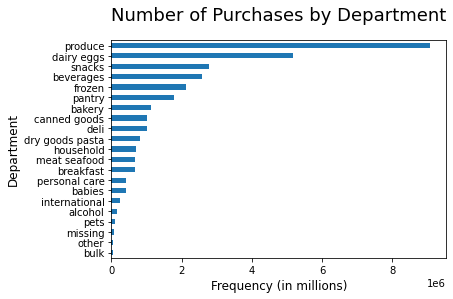

In [96]:
# Department popularity, in terms of numbers of orders placed, graphed.
bar_orders_by_department = high_cust_df['department'].value_counts().sort_values().plot.barh()
plt.title('Number of Purchases by Department', fontsize = 18, pad=20)
plt.xlabel('Frequency (in millions)', fontsize = 12)
plt.ylabel('Department',  fontsize = 12)
#bar_orders_by_department.figure.set_size_inches(12, 12)

In [97]:
# Save graph
bar_orders_by_department.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'bar_orders_by_department.png'), facecolor='white', bbox_inches='tight')

In [98]:
high_cust_df['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

Text(0, 0.5, 'Loyalty Class')

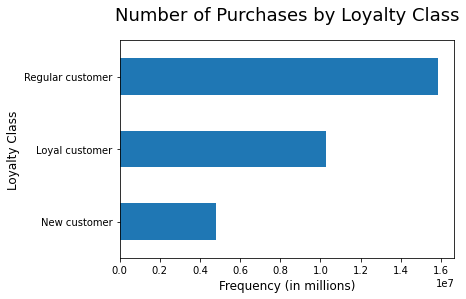

In [99]:
bar_orders_by_loyalty = high_cust_df['loyalty_flag'].value_counts().sort_values().plot.barh()
plt.title('Number of Purchases by Loyalty Class', fontsize = 18, pad=20)
plt.xlabel('Frequency (in millions)', fontsize = 12)
plt.ylabel('Loyalty Class',  fontsize = 12)
#bar_orders_by_department.figure.set_size_inches(24, 24)

In [100]:
# Save graph
bar_orders_by_loyalty.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'bar_orders_by_loyalty.png'), facecolor='white', bbox_inches='tight')

In [101]:
# Studying loyalty_flag vs. days_since_prior_order

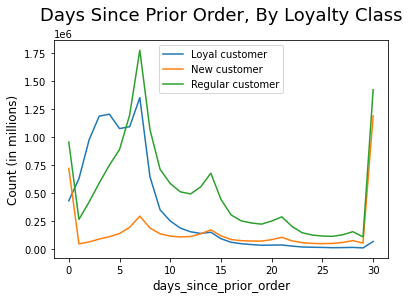

In [102]:
# Group data by 'loyalty_flag' and 'days_since_prior_order'
grouped = high_cust_df.groupby(['loyalty_flag', 'days_since_prior_order'])['days_since_prior_order'].count()

# Loop over each value of 'loyalty_flag' and plot a line
for flag in grouped.index.levels[0]:
    line = grouped.loc[flag]
    sns.lineplot(data=line, label=flag)

# Add labels and title
plt.xlabel('days_since_prior_order', fontsize=12)
plt.ylabel('Count (in millions)', fontsize=12)
plt.title('Days Since Prior Order, By Loyalty Class', fontsize=18, pad=20)

# Add legend
plt.legend()

# Save the graph
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'line_days_since_prior_order_by_loyalty_flag.png'), facecolor='white')


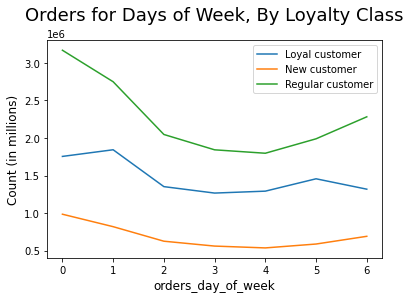

In [103]:
# Group data by 'loyalty_flag' and 'orders_day_of_week'
grouped = high_cust_df.groupby(['loyalty_flag', 'orders_day_of_week'])['orders_day_of_week'].count()

# Loop over each value of 'loyalty_flag' and plot a line
for flag in grouped.index.levels[0]:
    line = grouped.loc[flag]
    sns.lineplot(data=line, label=flag)

# Add labels and title
plt.xlabel('orders_day_of_week', fontsize=12)
plt.ylabel('Count (in millions)', fontsize=12)
plt.title('Orders for Days of Week, By Loyalty Class', fontsize=18, pad=20)

# Add legend
plt.legend()

# Save the graph
plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', f'line_orders_day_of_week_by_loyalty_flag.png'), facecolor='white')
